## Clean and analyze employee exit surveys

We are analyzing DETE and TAFE exit survey to analyze the 
employee trends of the institutions

In [548]:
import numpy as np
import pandas as pd

dete_survey=pd.read_csv("dete_survey.csv")
tafe_survey=pd.read_csv("tafe_survey.csv")

Question : Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In [549]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [550]:
dete_survey.head(2)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN


In [551]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [552]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


The data set has lot of missing values for few columns
1. dete_survey has column enteries as "NOT STATED" instead of NaN
2. bothe data frames contains columns which are not required in the analysis
3. Similar Columns in both the data frames have different column names
4. There are multiple reasons which state why the employee has left the organization

## Cleaning the data

In [553]:
# Reading Non stated values as NaN
dete_survey=pd.read_csv("dete_survey.csv",na_values="Not Stated")

In [554]:
dete_survey.head(5)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [555]:
dete_survey.shape

(822, 56)

In [556]:
# Dropping some columns which are not required for our analysis
dete_survey_updated=dete_survey.drop(dete_survey.columns[28:49],axis=1)

In [557]:
dete_survey_updated.shape

(822, 35)

In [558]:
tafe_survey.shape

(702, 72)

In [559]:
tafe_survey_updated=tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

In [560]:
tafe_survey_updated.shape

(702, 23)

Dropped some columns which were creating overhead for the analysis

In [561]:
dete_columns=dete_survey_updated.columns

In [562]:
dete_columns=dete_columns.str.lower().str.strip().str.replace(" ","_")
dete_survey_updated.columns=dete_columns

In [563]:
dete_survey_updated.head(5)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [564]:
update_col_names={'Record ID': 'id','CESSATION YEAR': 'cease_date',\
                  'Reason for ceasing employment': 'separationtype',\
                  'Gender. What is your Gender?': 'gender',\
                  'CurrentAge. Current Age': 'age',\
                  'Employment Type. Employment Type': 'employment_status',\
                  'Classification. Classification': 'position',\
                  'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',\
                  'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
                 }

In [565]:
tafe_survey_updated=tafe_survey_updated.rename(columns=update_col_names)

In [566]:
tafe_survey_updated.head(2)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN


Renamed some columns for better readability in the analysis

## Selecting only resignation type of leave reasons because we want to analyze employees who resigned

In [567]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [568]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [569]:
resignationcols_detesurvey=\
(dete_survey_updated['separationtype']=='Resignation-Other reasons') |\
(dete_survey_updated['separationtype']=='Resignation-Other employer') |\
(dete_survey_updated['separationtype']==\
 'Resignation-Move overseas/interstate')

In [570]:
dete_resignations_copy = dete_survey_updated[resignationcols_detesurvey]

In [571]:
dete_resignations=dete_resignations_copy.copy()

In [572]:
dete_resignations['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [573]:
tafe_resignations_copy = \
tafe_survey_updated[tafe_survey_updated
['separationtype']=='Resignation']

In [574]:
tafe_resignations=tafe_resignations_copy.copy()

In [575]:
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

In [576]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
2010         1
07/2006      1
07/2012      1
Name: cease_date, dtype: int64

In [577]:
pattern=r"([1-2][0-9]{3})"

In [578]:
list1=dete_resignations['cease_date'].str.extract(pattern).astype(float)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



In [579]:
dete_resignations['cease_date']=list1

In [580]:
dete_resignations.head(5)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [581]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [582]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

## Plotting box plot

In [583]:
import matplotlib as plt

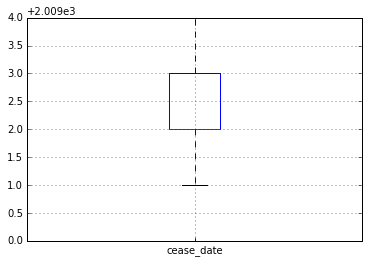

In [584]:
%matplotlib inline
tafe_resignations.boxplot('cease_date')

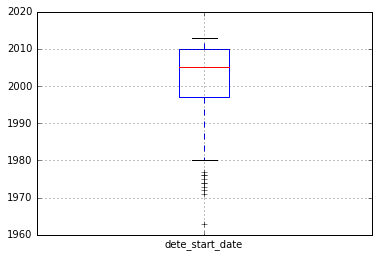

In [585]:
dete_resignations.boxplot('dete_start_date')

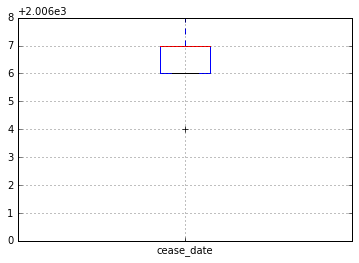

In [586]:
dete_resignations.boxplot('cease_date')

In [587]:
dete_resignations['cease_date'].value_counts().sort_index(ascending=False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [588]:
dete_resignations['institute_service']=\
dete_resignations['cease_date']-dete_resignations['dete_start_date']

We wanted to analyse the total number of years that a particular employee worked

In [589]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [590]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [591]:
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True

In [592]:
tafe_resignations.loc[:,['Contributing Factors. Dissatisfaction',\
                 'Contributing Factors. Job Dissatisfaction']]=tafe_resignations.loc[:,['Contributing Factors. Dissatisfaction',\
                 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)

In [593]:
tafe_resignations['dissatisfied']=tafe_resignations.loc[:,['Contributing Factors. Dissatisfaction',\
                 'Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False)

In [594]:
tafe_resignations['dissatisfied']

3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
13     False
14      True
15     False
16       NaN
17      True
18       NaN
19     False
20      True
21     False
22     False
23     False
24     False
26      True
27     False
29     False
32     False
36     False
37     False
39     False
40      True
41     False
42     False
       ...  
659    False
660    False
661     True
665    False
666    False
669    False
670      NaN
671     True
675     True
676    False
677    False
678    False
679    False
681    False
682    False
683    False
684    False
685     True
686    False
688    False
689     True
690    False
691    False
693    False
694    False
696    False
697    False
698    False
699    False
701    False
Name: dissatisfied, Length: 340, dtype: object

In [595]:
tafe_resignations_up=tafe_resignations.copy()

In [596]:
tafe_resignations_up.head(1)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False


In [597]:
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [598]:
dete_resignations.head(1)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0


In [600]:
# dete_resignations.loc[:,['job_dissatisfaction',\
#                          'dissatisfaction_with_the_department',\
#                         'physical_work_environment',\
#                         'lack_of_recognition',\
#                         'lack_of_job_security',\
#                         'work_location',\
#                         'employment_conditions',\
#                         'work_life_balance',\
#                         'workload']]=\
# dete_resignations.loc[:,['job_dissatisfaction',\
#                          'dissatisfaction_with_the_department',\
#                         'physical_work_environment',\
#                         'lack_of_recognition',\
#                         'lack_of_job_security',\
#                         'work_location',\
#                         'employment_conditions',\
#                         'work_life_balance',\
#                         'workload']].applymap(update_vals)

In [601]:
dete_resignations.loc[:,['job_dissatisfaction',\
                         'dissatisfaction_with_the_department',\
                        'physical_work_environment',\
                        'lack_of_recognition',\
                        'lack_of_job_security',\
                        'work_location',\
                        'employment_conditions',\
                        'work_life_balance',\
                        'workload']]

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
3,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False
14,True,True,False,False,False,False,False,False,False
16,False,False,False,True,False,False,False,False,False
20,False,False,False,False,False,False,False,False,False
21,False,False,False,False,False,False,False,False,False


In [602]:
dete_resignations['dissatisfied']=\
dete_resignations.loc[:,['job_dissatisfaction',\
                         'dissatisfaction_with_the_department',\
                        'physical_work_environment',\
                        'lack_of_recognition',\
                        'lack_of_job_security',\
                        'work_location',\
                        'employment_conditions',\
                        'work_life_balance',\
                        'workload']].any(axis=1, skipna=False)

In [603]:
dete_resignations['dissatisfied']

3      False
5       True
8      False
9       True
11     False
12     False
14      True
16      True
20     False
21     False
22      True
23      True
25      True
27     False
33      True
34      True
37     False
39      True
40     False
41      True
42     False
43      True
48     False
50     False
51     False
55     False
57     False
61     False
69      True
71     False
       ...  
747    False
751     True
752    False
753     True
755    False
762    False
766    False
769    False
770    False
771    False
774    False
784     True
786     True
788    False
789    False
790     True
791     True
794    False
797    False
798    False
802    False
803    False
804    False
806    False
807     True
808    False
815    False
816    False
819     True
821    False
Name: dissatisfied, Length: 311, dtype: bool

In [604]:
dete_resignations_up=dete_resignations.copy()

In [605]:
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

## Combining the data of both the data sets

In [606]:
dete_resignations_up['institute']='DETE'
tafe_resignations_up['institute']='TAFE'

In [607]:
combined=pd.concat([dete_resignations_up,tafe_resignations_up],ignore_index=True)

In [608]:
dete_resignations_up=dete_resignations_up.dropna(thresh=500)
tafe_resignations_up=tafe_resignations_up.dropna(thresh=500)

In [609]:
dete_resignations_up['institute_service']=dete_resignations_up['institute_service'].astype(str)

In [610]:
# Check the unique values
combined['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
12.0                   6
22.0                   6
17.0                   6
10.0                   6
14.0                   6
18.0                   5
16.0                   5
23.0                   4
24.0                   4
11.0                   4
39.0                   3
21.0                   3
32.0                   3
19.0                   3
36.0                   2
30.0                   2
26.0                   2
28.0                   2
25.0                   2


In [611]:
combined['institute_service_up'] = combined['institute_service'].astype('str').str.extract(r'(\d+)')
combined['institute_service_up'] = combined['institute_service_up'].astype('float')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



In [612]:
combined['institute_service_up'].value_counts(dropna=False)

 1.0     159
NaN       88
 3.0      83
 5.0      56
 7.0      34
 11.0     30
 0.0      20
 20.0     17
 6.0      17
 4.0      16
 9.0      14
 2.0      14
 13.0      8
 8.0       8
 15.0      7
 22.0      6
 10.0      6
 17.0      6
 14.0      6
 12.0      6
 16.0      5
 18.0      5
 24.0      4
 23.0      4
 21.0      3
 39.0      3
 32.0      3
 19.0      3
 36.0      2
 30.0      2
 25.0      2
 26.0      2
 28.0      2
 42.0      1
 29.0      1
 35.0      1
 27.0      1
 41.0      1
 49.0      1
 38.0      1
 34.0      1
 33.0      1
 31.0      1
Name: institute_service_up, dtype: int64

In [625]:
# def career_stage(x):
#     if x>=11:
#         return "Veteran"
#     elif 7<=x<11:
#         return "Established"
#     elif 3<=x<7:
#         return "Experienced"
#     elif pd.isnull(x):
#         return np.nan
#     else:
#         return "New"


In [628]:
def career_stage(x):
    if x<3:
        return "New"
    elif 3<=x<7:
        return "Experienced"
    elif 7<=x<11:
        return "Established"
    elif pd.isnull(x):
        return np.nan
    else:
        return "Veteran"

In [629]:
combined['service_cat']=combined['institute_service_up'].apply(career_stage)

In [630]:
combined['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

In [631]:
combined['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [636]:
combined['dissatisfied']=combined['dissatisfied'].fillna(False)

In [637]:
combined_pvt=combined.pivot_table(index='service_cat',values='dissatisfied')

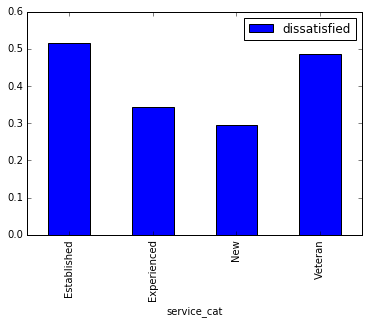

In [638]:
%matplotlib inline
combined_pvt.plot(kind='bar')


From the initial analysis above, we can tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service. However, we need to handle the rest of the missing data to finalize our analysis.